<a href="https://colab.research.google.com/github/vikram0050/Bike-Sharing-Demand-Prediction/blob/main/Vikramaditya_Sah_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Lets import all the packages needed for the pre processing and machine learning.

In [11]:
#Lets import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [12]:
path='/content/drive/MyDrive/Bike Sharing Demand/SeoulBikeData.csv'

In [13]:
#Lets create a dataframe
df = pd.read_csv(path, encoding = "ISO-8859-1")

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
#Collect the basic statistical information about the dataset by using transpose function we get the clear view of the information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [16]:
#Checking for the shape of the dataset
df.shape

(8760, 14)

In [17]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Checking for the missing values

In [18]:
#Checking for Null values in the dataset
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [19]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Surprisingly,We didn't have any of the missing and null values in the dataset.So,there is no needed for the null value treatment in the dataset



In [20]:
#converting date columns to Date format
df['Date']= pd.to_datetime(df['Date'], format = "%d/%m/%Y" )

In [21]:
# extracting day,month, day of week and weekdays/weekend from date column
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

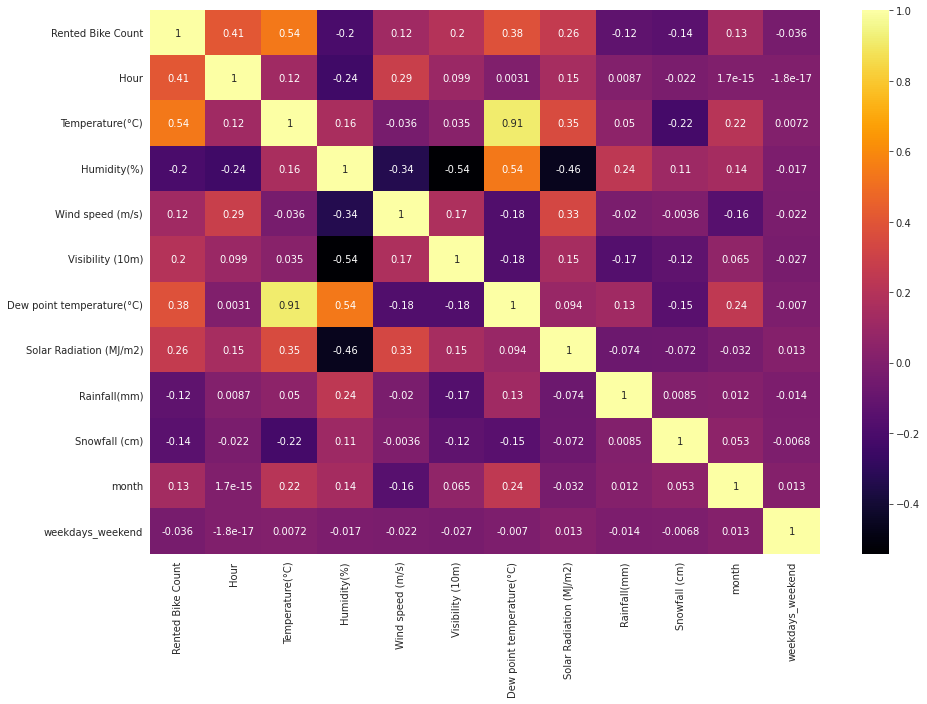

In [22]:
#checking correlation with the help of heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='inferno',annot=True)

In [23]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   
 
   return(vif)

In [24]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.960112
1,Temperature(°C),3.288623
2,Humidity(%),6.155420
3,Wind speed (m/s),4.651787
4,Visibility (10m),5.359009
5,Solar Radiation (MJ/m2),2.260940
6,Rainfall(mm),1.080309
7,Snowfall (cm),1.131108
8,month,5.009301
9,weekdays_weekend,1.380635


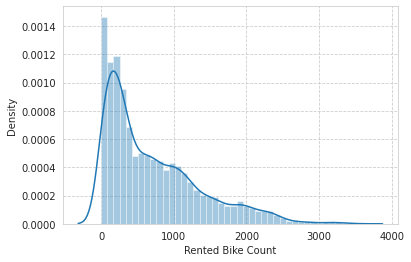

In [25]:
sns.distplot(df['Rented Bike Count'])

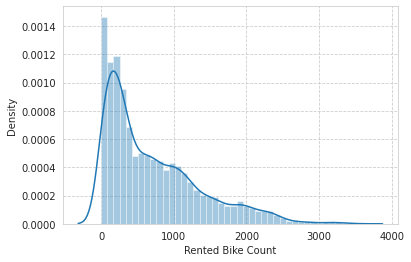

In [26]:
sns.distplot(df['Rented Bike Count'])

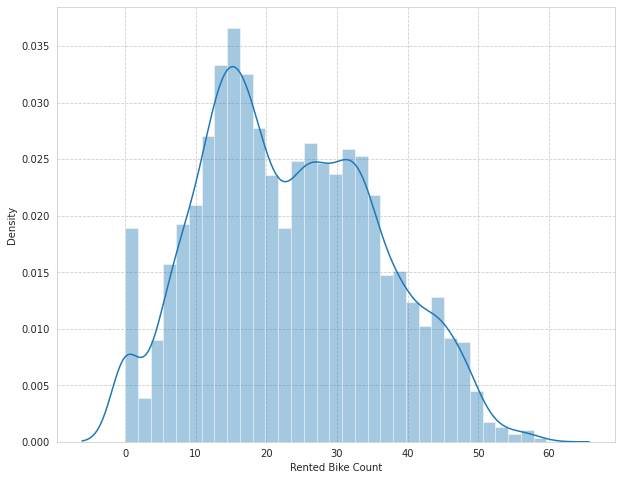

In [27]:
#transforming square_root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [28]:
#extracting numeric columns
numeric_features= df.select_dtypes(exclude='object')

In [29]:
#numeric columns info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [30]:
#describing numeric feature
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


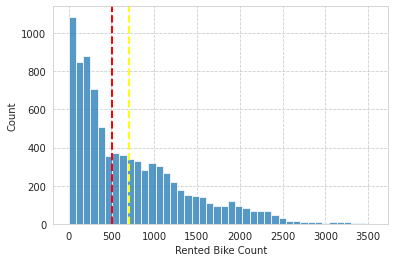

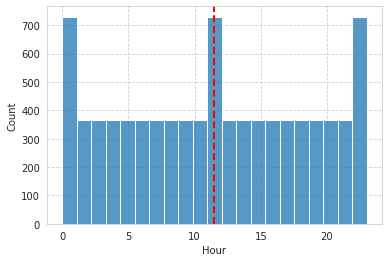

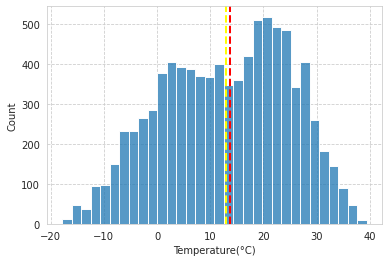

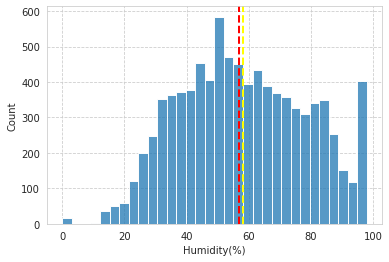

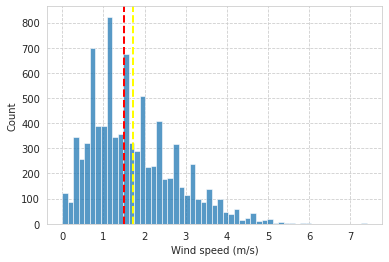

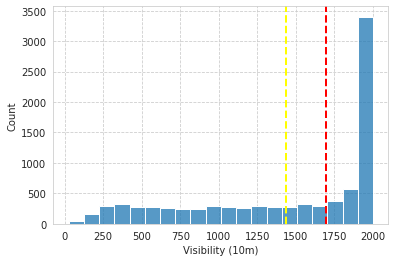

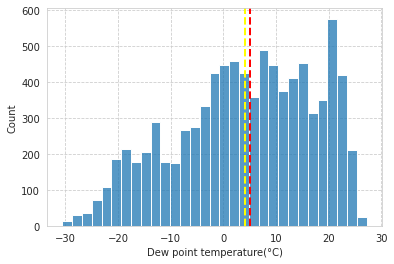

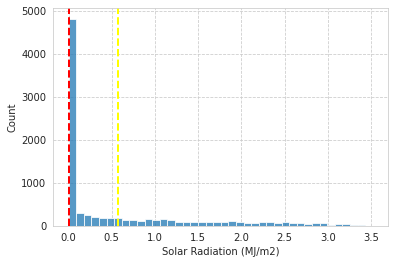

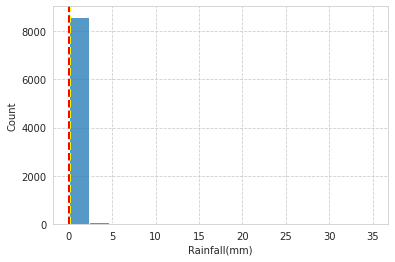

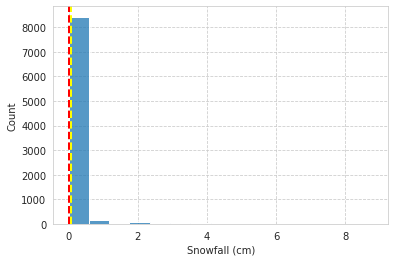

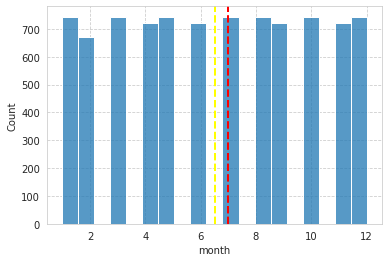

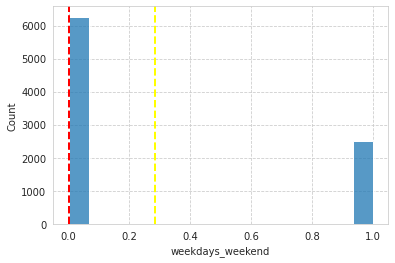

In [31]:
#plotting histogram of dataset
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='yellow', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

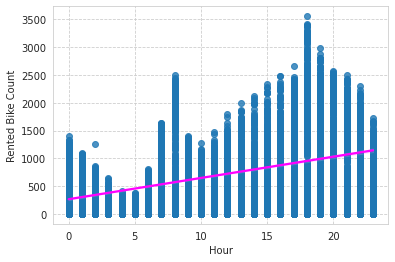

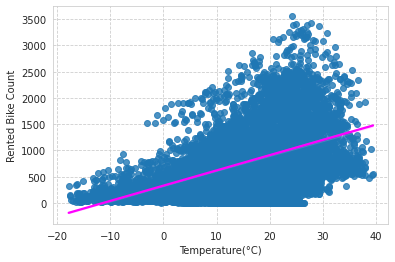

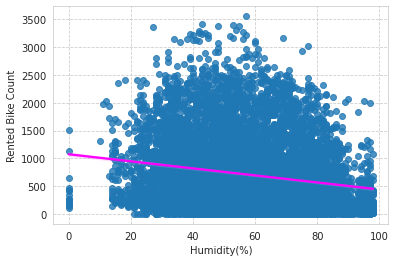

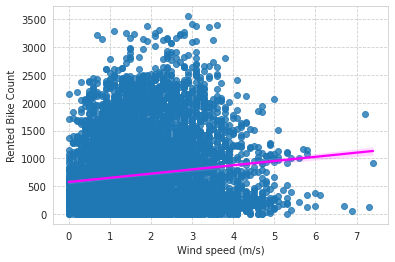

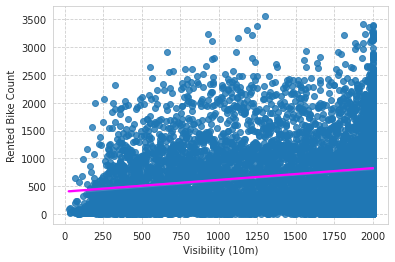

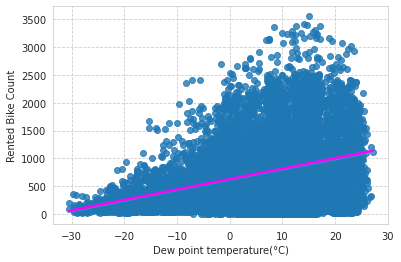

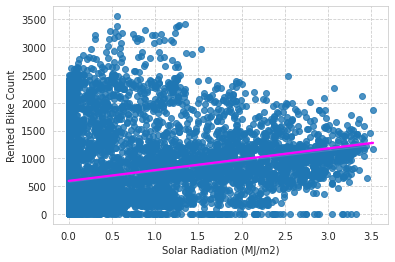

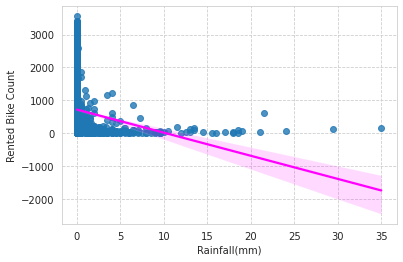

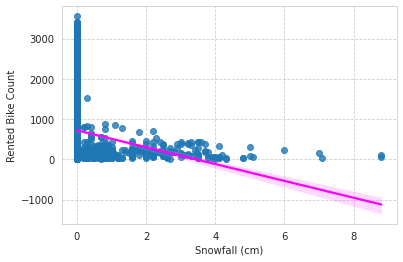

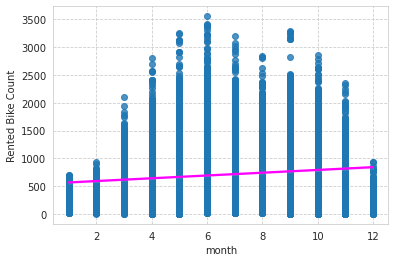

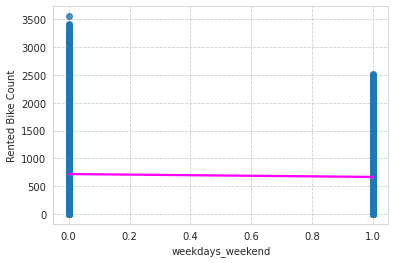

In [32]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "magenta"})
  
  plt.show()

In [33]:
#Extracting categorical columns
categorical_features= df.select_dtypes(include='object')

In [34]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


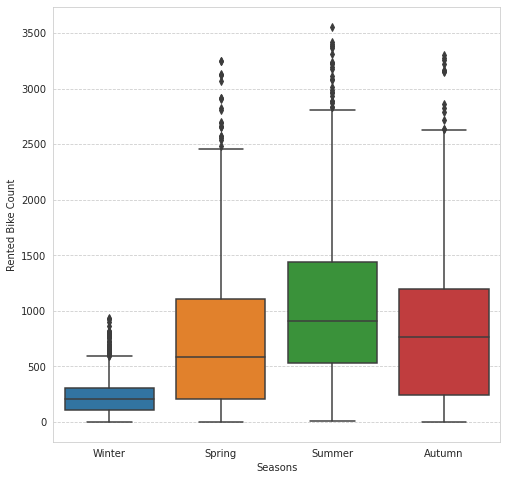

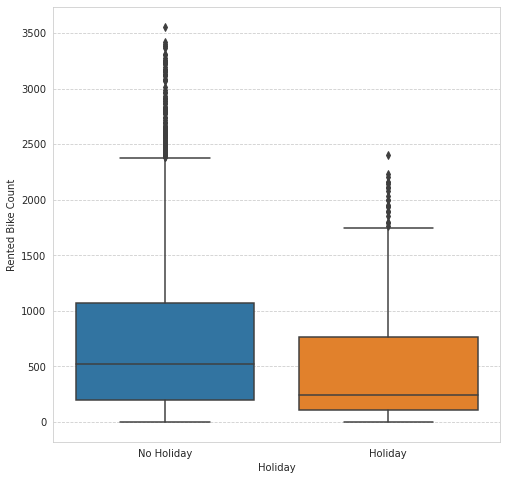

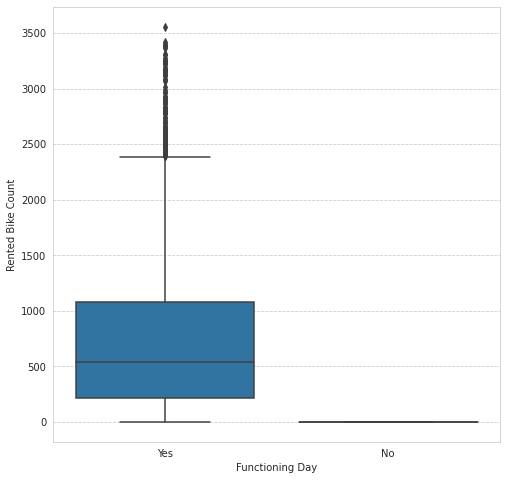

In [35]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(8,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

**CONCLUSION**

Less demand on winter seasons
Sligthly Higher demand during Non holidays
Almost no demnad on non functioning day

In [36]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

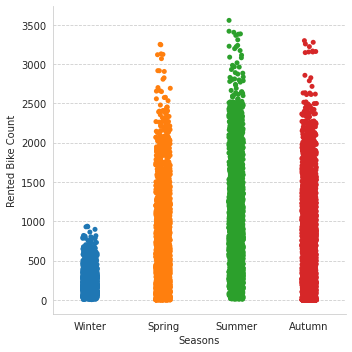

In [37]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

**CONCLUSION**

we can clearly see that there is less demand of rented bike during winter season

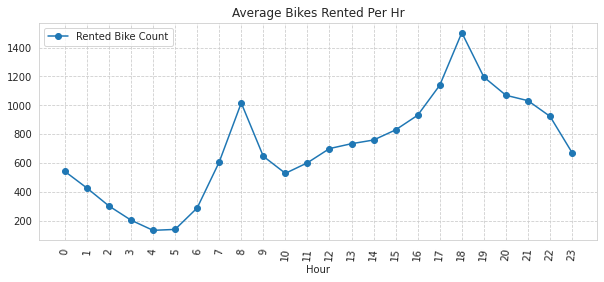

In [38]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(10,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

**conclusion**


*   
High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
*   we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand



In [39]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [40]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [41]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [42]:
#showing head
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0


In [43]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


<Figure size 2000x1600 with 0 Axes>

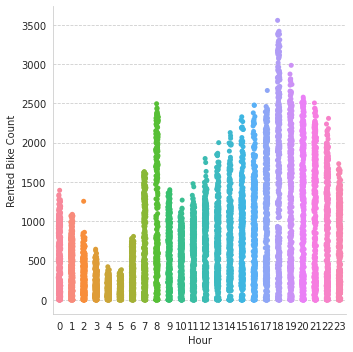

<Figure size 2000x1600 with 0 Axes>

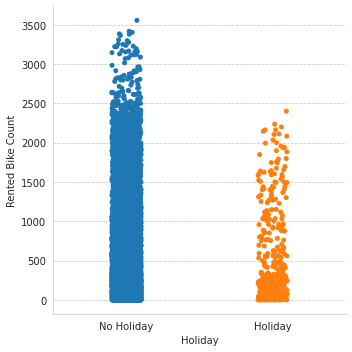

<Figure size 2000x1600 with 0 Axes>

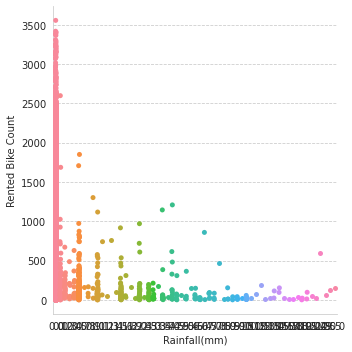

<Figure size 2000x1600 with 0 Axes>

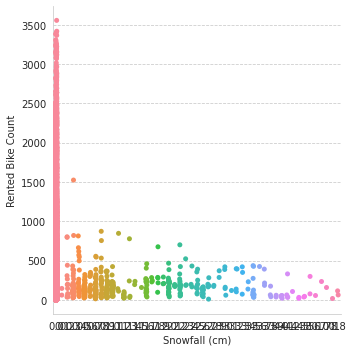

<Figure size 2000x1600 with 0 Axes>

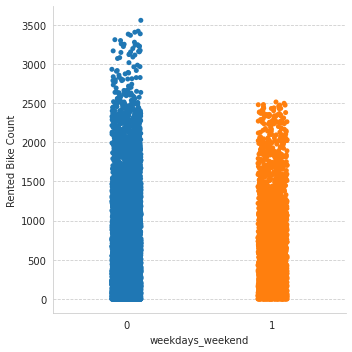

In [44]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

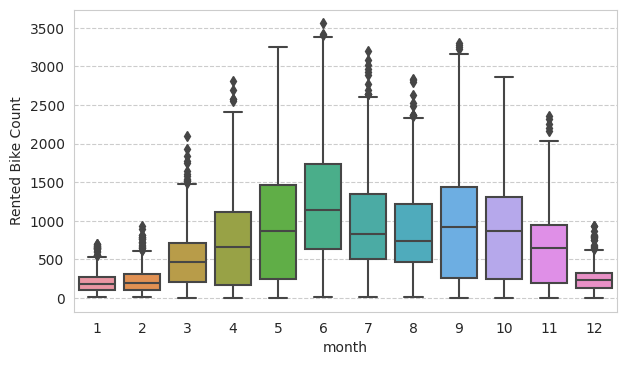

In [45]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

**conclusion:**

we can see that there less demand of Rented bike in the month of December
january,February i.e during winter seasons
Also demand of bike is maximum during May,june,july i.e Summer 

# FUNCTION
Creating Function to train linear models and calculate scores

In [46]:
 #creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]



In [47]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

creating function to run diffirent models



In [48]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

creating function to get feature importance

In [49]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# Train | Test Split for LR

In [51]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [52]:
X.shape

(8760, 16)

In [53]:
y=np.sqrt(final_df['Rented Bike Count'])

In [54]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [55]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regresseion

In [56]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [57]:
#creating linear regression model
linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 173825.05084628204
RMSE : 416.9233153066425
R2 : 0.5772050670108093
Adjusted R2 :  0.5740919888111651

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



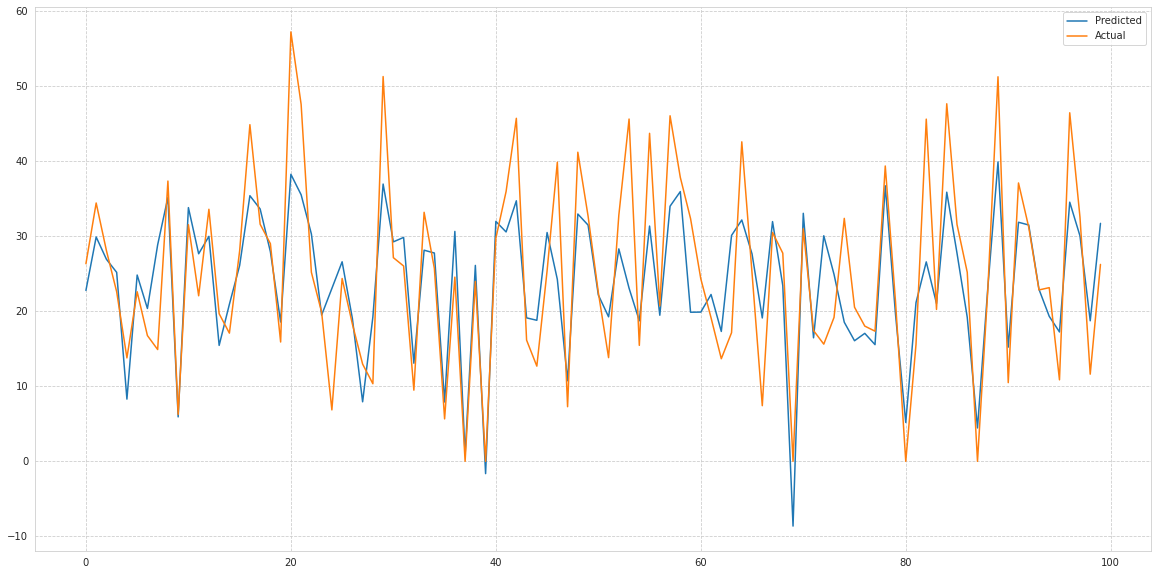

In [58]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Regularisation

**Lasso Regression**

In [59]:
#importing lasso 
from sklearn.linear_model import Lasso

In [60]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 173817.07267807008
RMSE : 416.913747288417
R2 : 0.577224472321368
Adjusted R2 :  0.5741115370048203

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



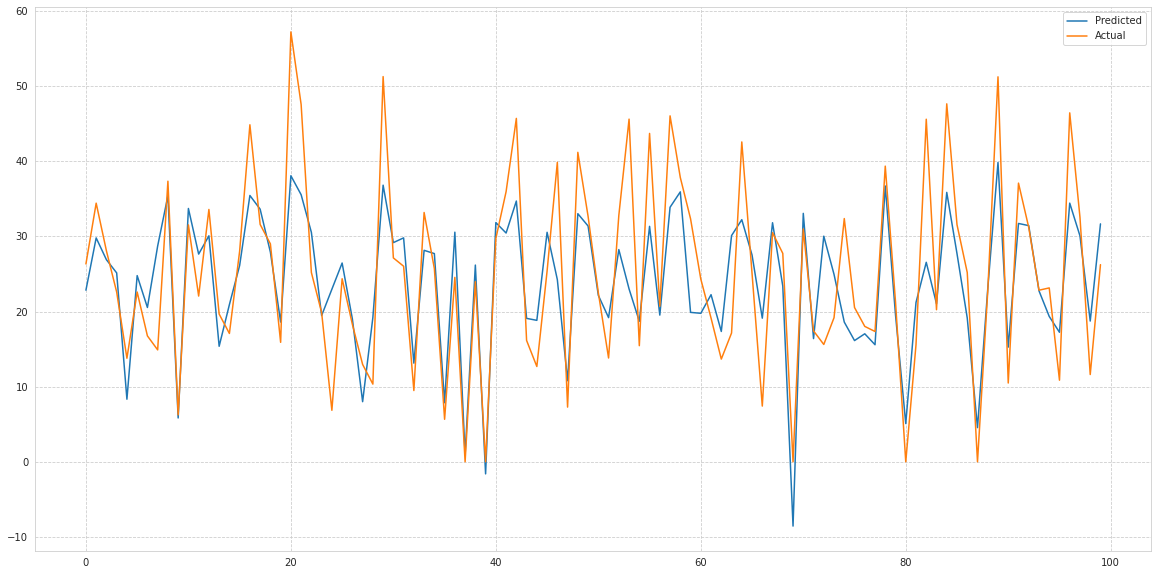

In [61]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

**RIDGE REGRESSION**

In [62]:
# importing the Ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 173479.06248284792
RMSE : 416.50817817042673
R2 : 0.5780466150283188
Adjusted R2 :  0.5749397332245696

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



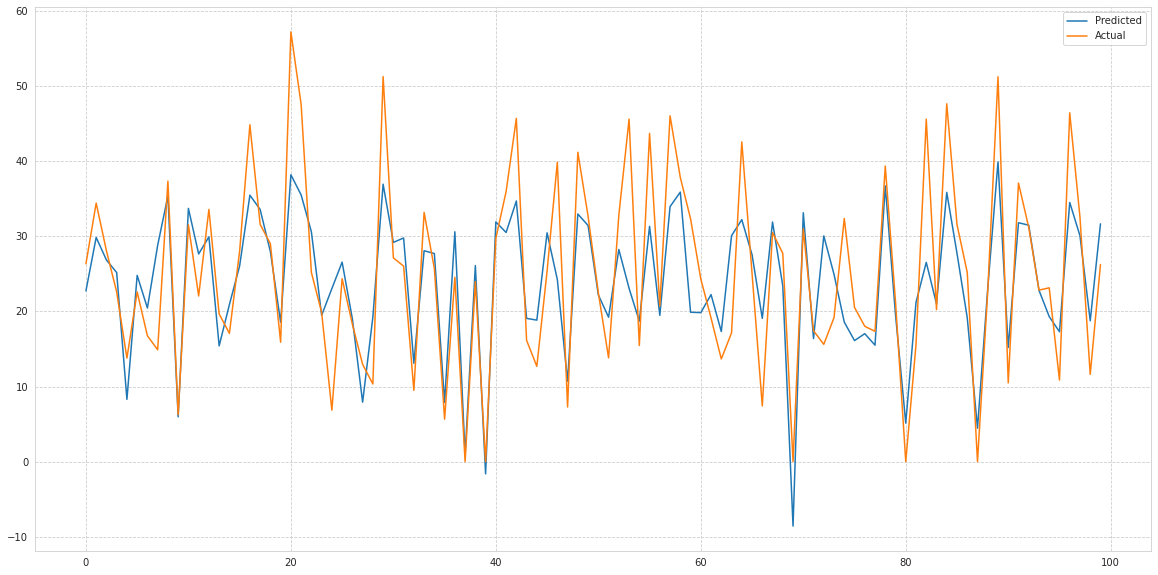

In [63]:
# calling train_linear_model to train,fit and evalution of ridge model
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

**ElasticNet Regression**

In [64]:
#importing Elasticnet model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 173579.58873536708
RMSE : 416.62883809857317
R2 : 0.5778021048729034
Adjusted R2 :  0.574693422718263

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



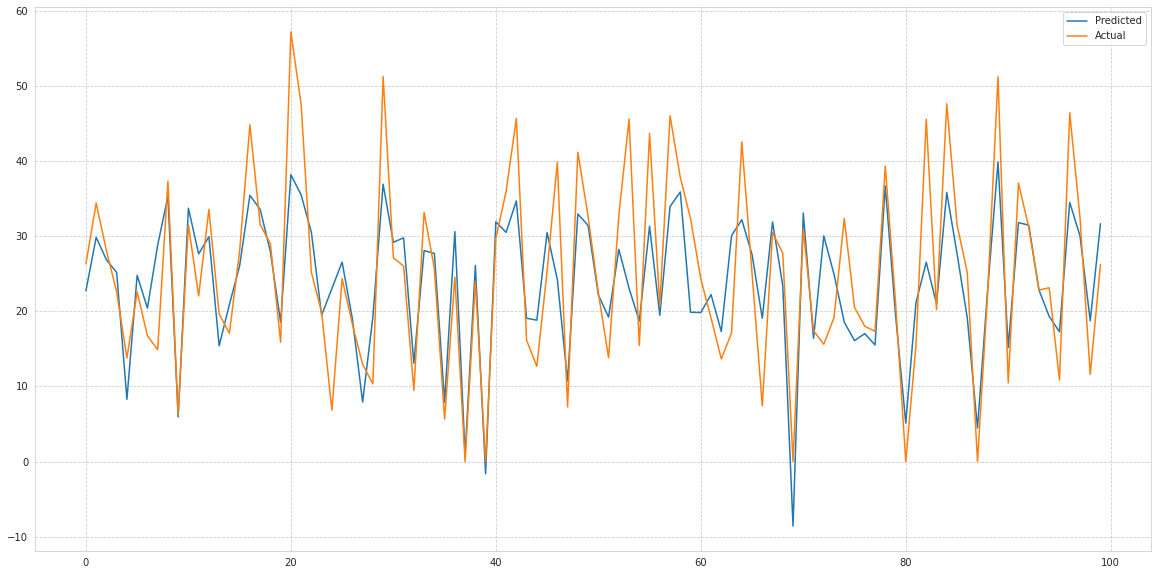

In [65]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

**Polynomial Regression**

In [66]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [67]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 107153.14653867418
RMSE : 327.34255228838515
R2 : 0.7393712402796131
Adjusted R2 :  0.7374522066139315

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



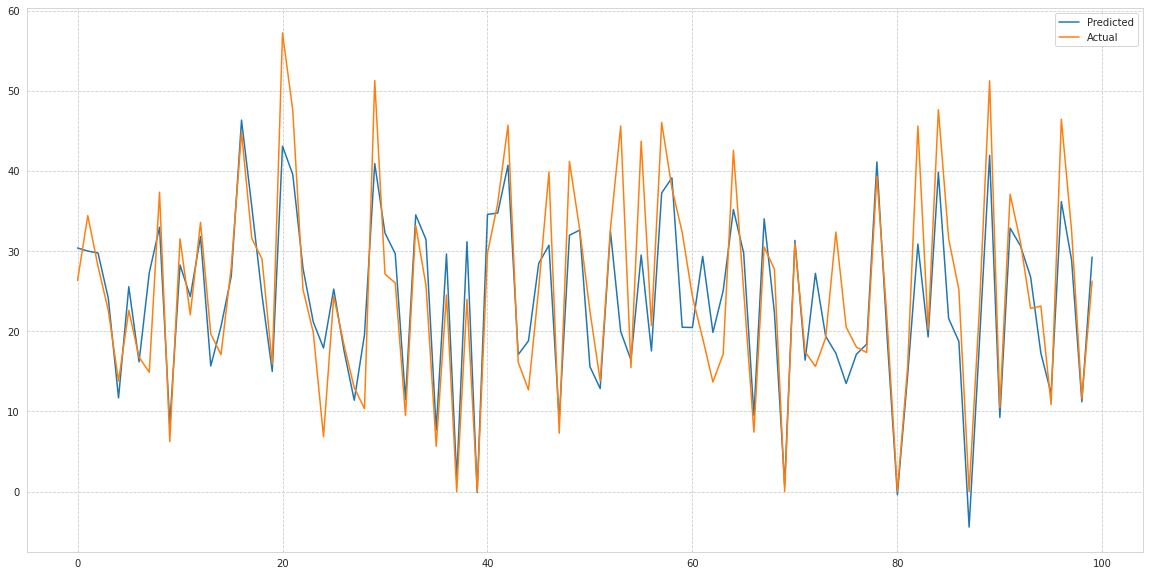

In [68]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

#KNN and Tree Based Method Train | Test split Data For Tree based methods

In [69]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [70]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [71]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**KNN Regression**

In [72]:
#importing Knn 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [73]:
#creating model
scaler = MinMaxScaler()

In [74]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 73455.4125317098
RMSE : 271.02659008243046
R2 : 0.8204906255151572
Adjusted R2 :  0.8191688813864146

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



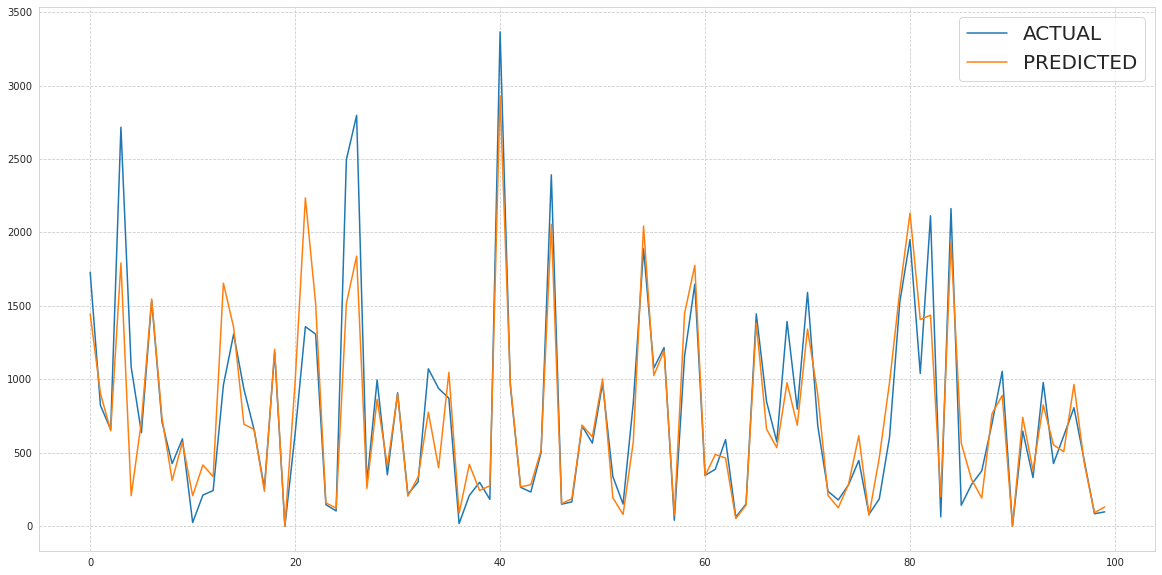

In [75]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

#Decision Tree Regression

In [76]:
#importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 62615.07625570776
RMSE : 250.23004666847618
R2 : 0.8469820972398642
Adjusted R2 :  0.8458554122678613

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



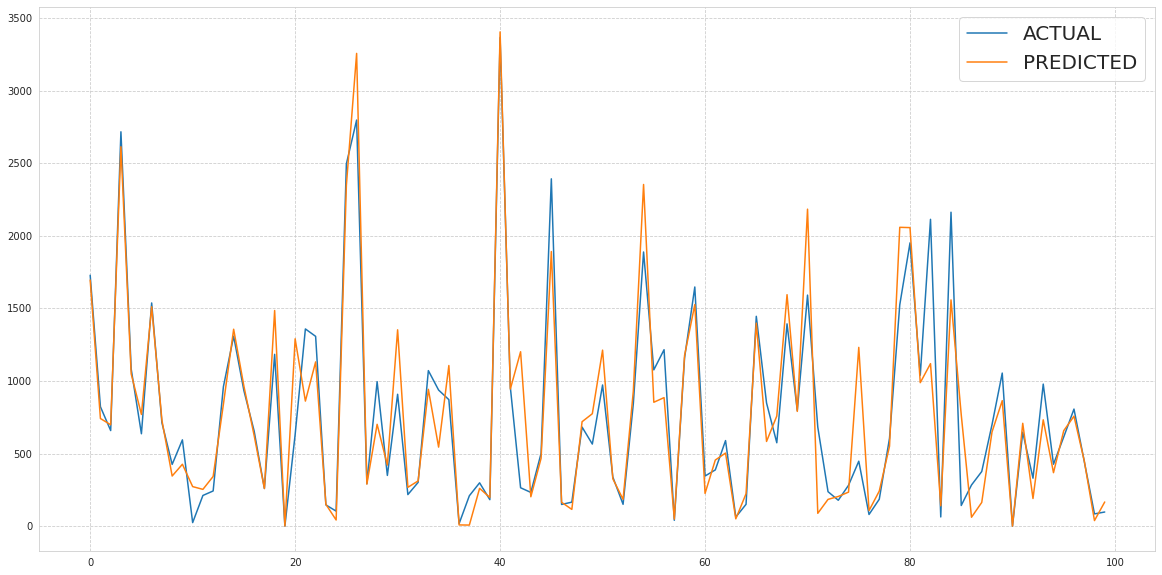

In [77]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

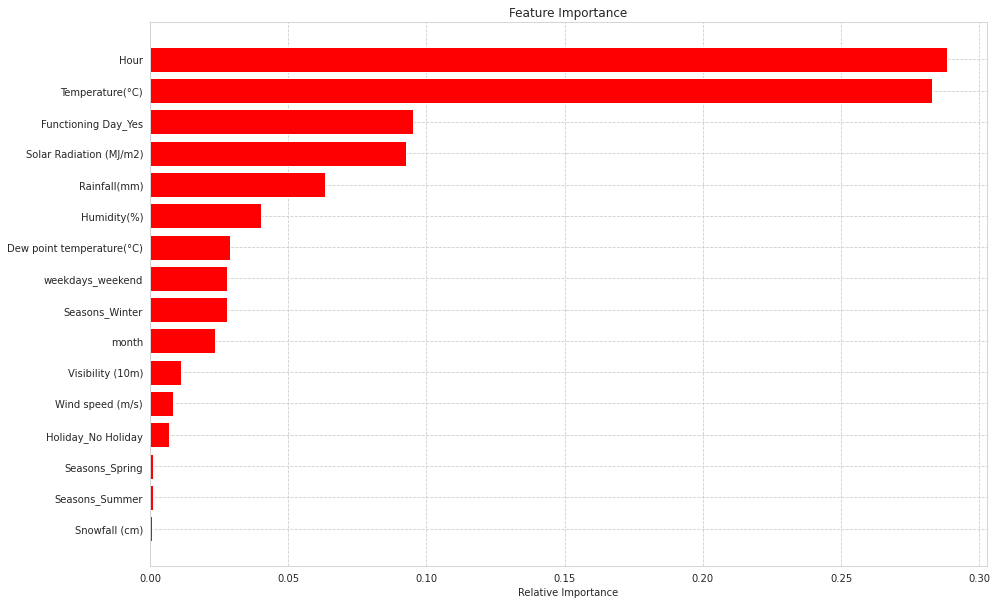

In [78]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest


In [79]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [80]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [81]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [82]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 49297.16990820833
RMSE : 222.02965997408617
R2 : 0.879528222235831
Adjusted R2 :  0.8786411773926526

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



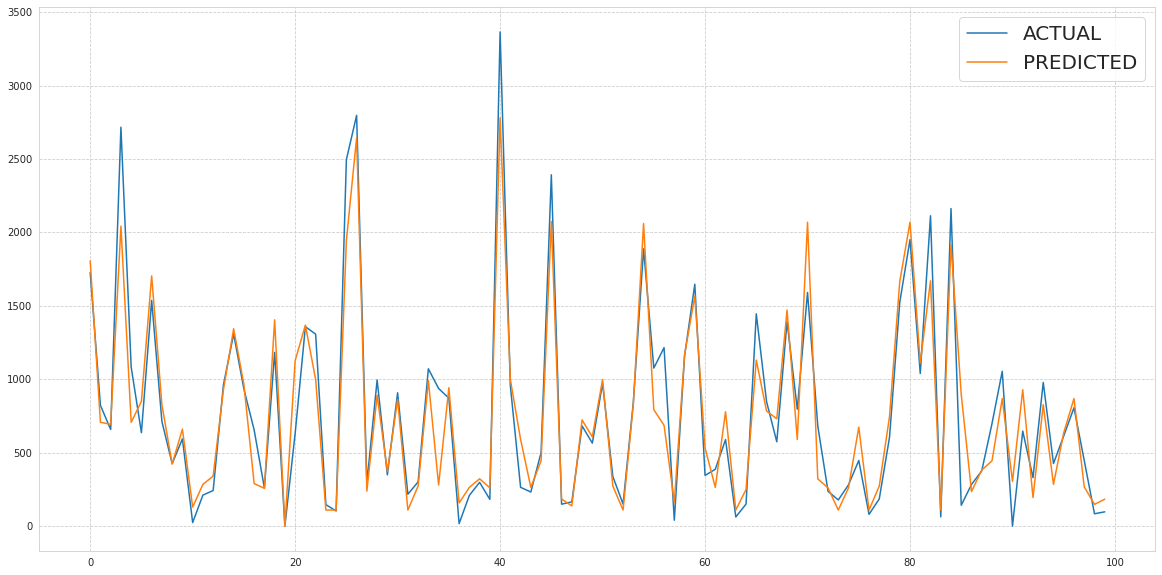

In [83]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [84]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

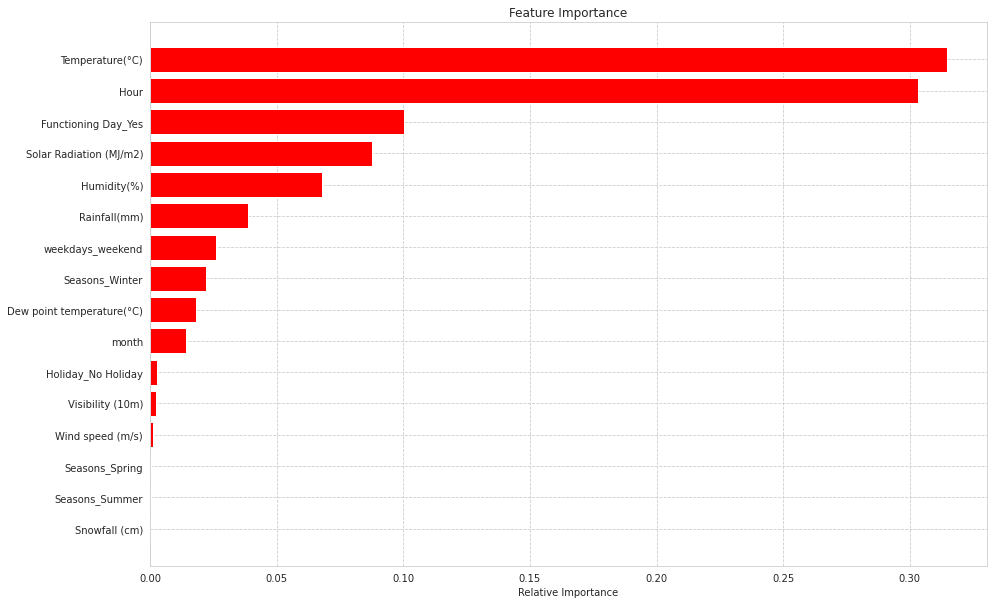

In [85]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

# gradient boosting

In [86]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [88]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [89]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 42254.15880588506
RMSE : 205.55816404581225
R2 : 0.8967398404664424
Adjusted R2 :  0.8959795263603508

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



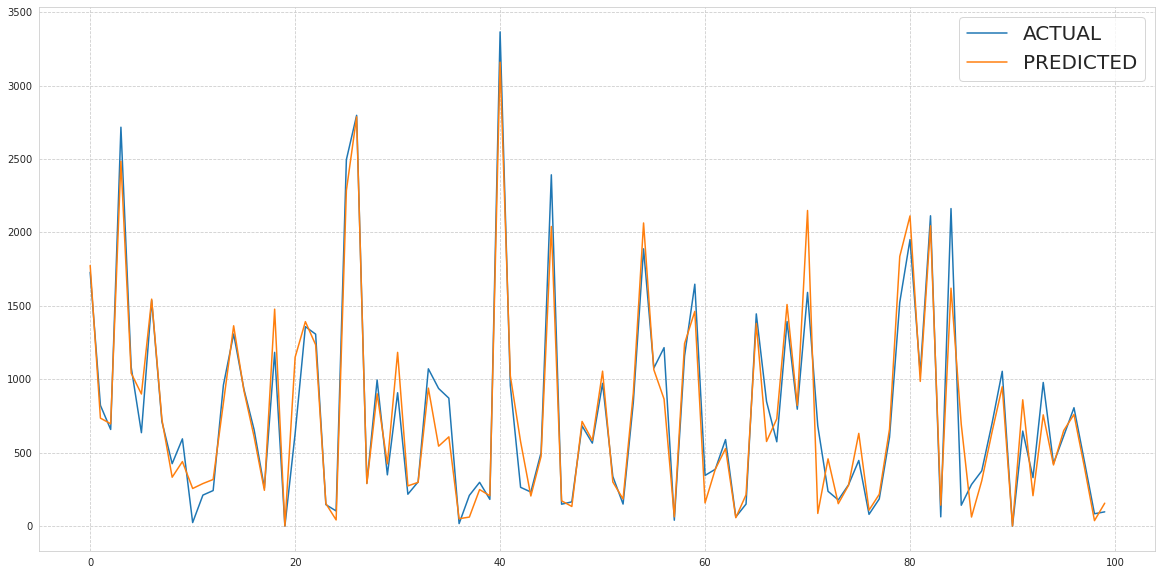

In [90]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [91]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

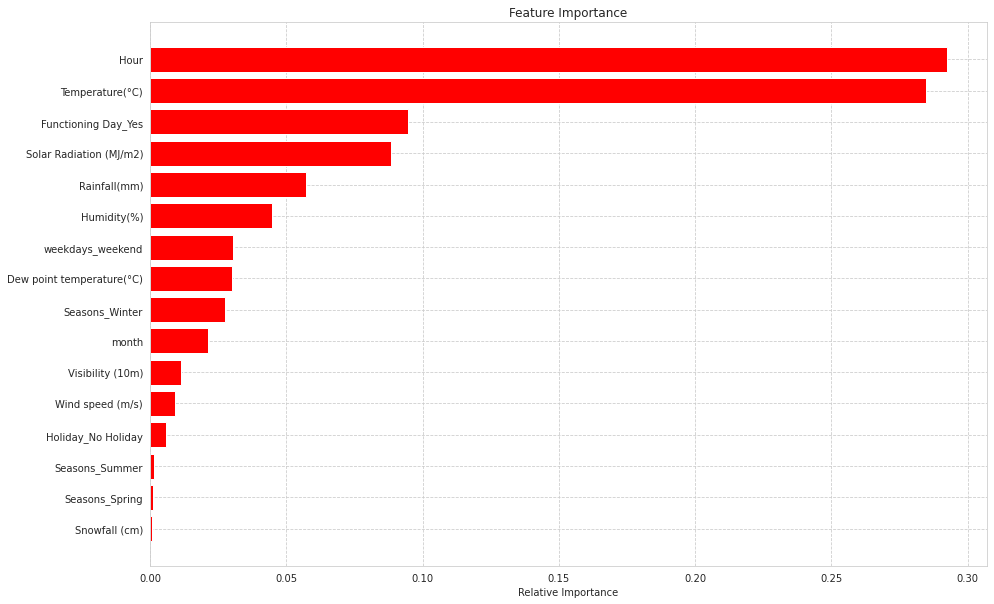

In [92]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

# eXtreme Gradient Boosting

In [93]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [96]:
#creating Xgboost model
xgb_model=XGBRegressor()


In [95]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [97]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[04:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

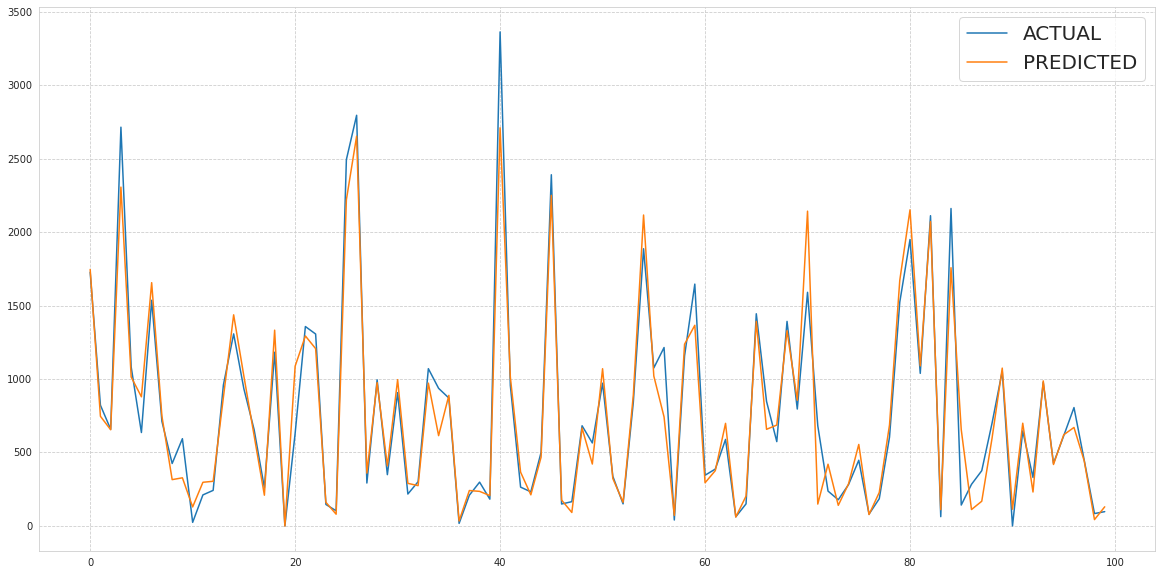

In [98]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [99]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

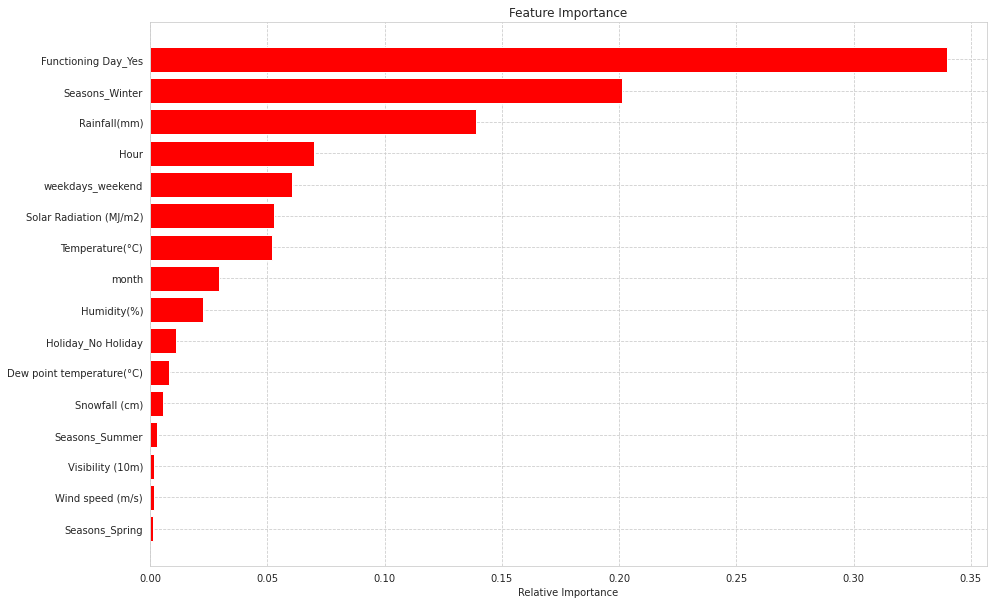

In [100]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

# catboost

In [101]:
#installing catboost
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [102]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [103]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 25318.664363181706
RMSE : 159.11839731213266
R2 : 0.9381265798396485
Adjusted R2 :  0.9376710001237877

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



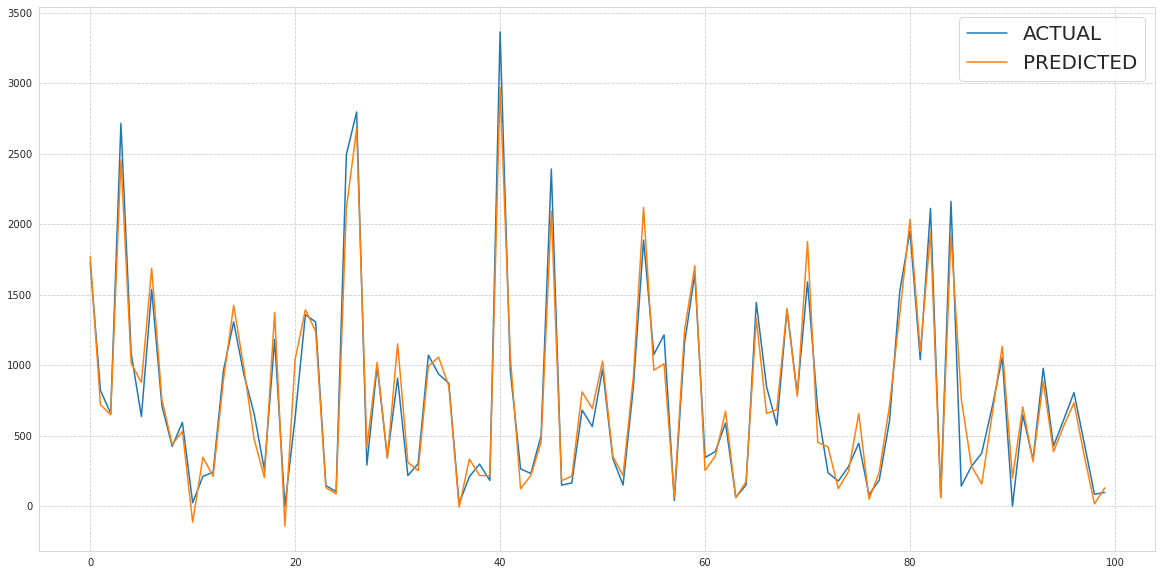

In [104]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [105]:
#checking params of cat boost model
cb_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05512600019574165,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fracti

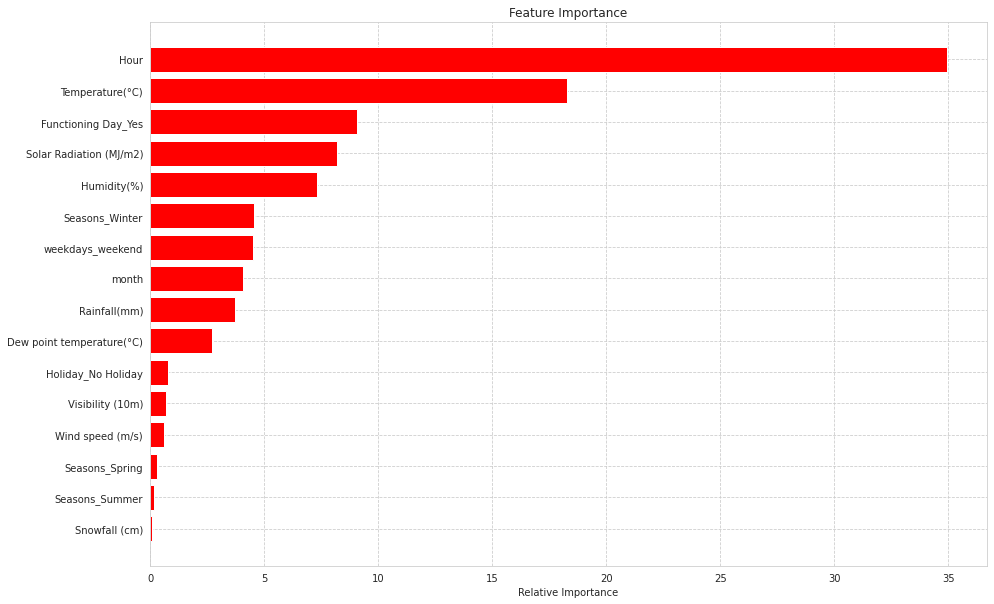

In [106]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

#lightGBM

In [107]:
import lightgbm as lgb

In [108]:
lgbr=lgb.LGBMRegressor()

In [109]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 24437.781770089725
RMSE : 156.32588323783662
R2 : 0.9402792691763568
Adjusted R2 :  0.9398395399112035

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



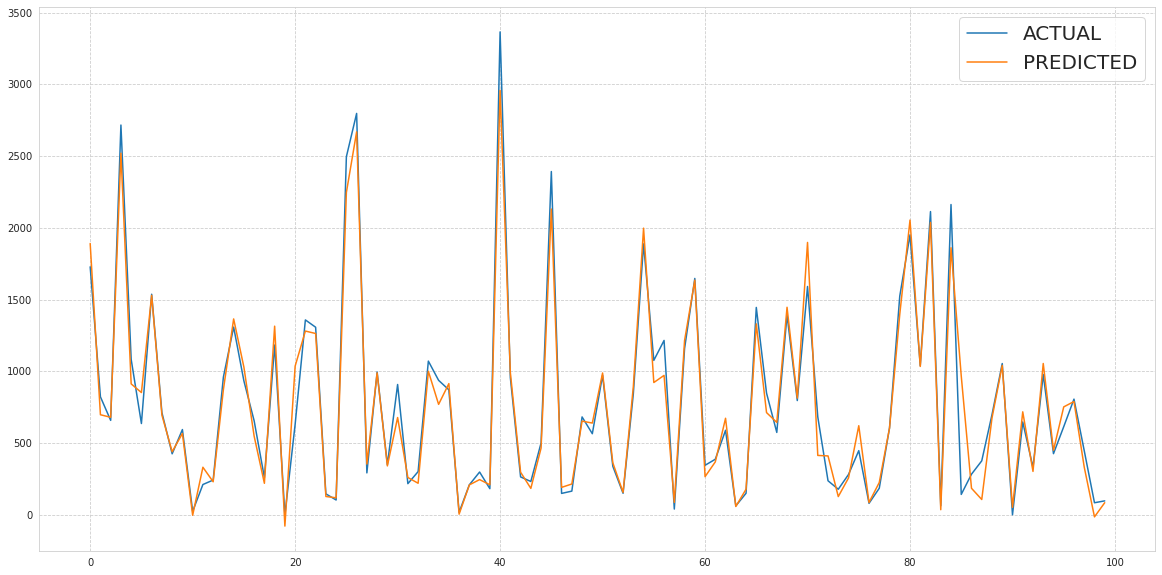

In [110]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

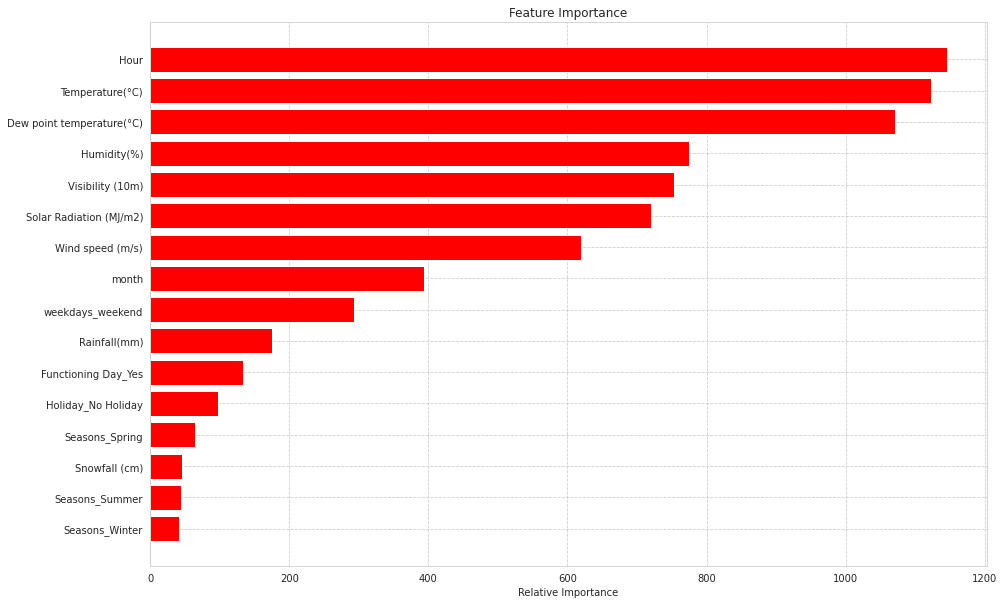

In [111]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

#Combined Evaluation Matrix of All the models

In [112]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [113]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']


In [114]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [115]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,K-Nearyest_Neighbor,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,CATBoost,lightGBM
Mean_square_error,173825.050846,173817.072678,173479.062483,173579.588735,107153.146539,73455.412532,62615.076256,49297.169908,42254.158806,27473.159716,25318.664363,24437.781770
Root_Mean_square_error,416.923315,416.913747,416.508178,416.628838,327.342552,271.026590,250.230047,222.029660,205.558164,165.750293,159.118397,156.325883
R2,0.577205,0.577224,0.578047,0.577802,0.739371,0.820491,0.846982,0.879528,0.896740,0.932861,0.938127,0.940279
Adjusted_R2,0.574092,0.574112,0.574940,0.574693,0.737452,0.819169,0.845855,0.878641,0.895980,0.932367,0.937671,0.939840


In [116]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [117]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,173825.050846,416.923315,0.577205,0.574092
1,Lasso,173817.072678,416.913747,0.577224,0.574112
2,Ridge,173479.062483,416.508178,0.578047,0.574940
3,Elasticnet,173579.588735,416.628838,0.577802,0.574693
4,Polynomial,107153.146539,327.342552,0.739371,0.737452
5,K-Nearyest_Neighbor,73455.412532,271.026590,0.820491,0.819169
6,Decision_Tree,62615.076256,250.230047,0.846982,0.845855
7,Random_Forest,49297.169908,222.029660,0.879528,0.878641
8,Gradient_Boosting,42254.158806,205.558164,0.896740,0.895980
9,Xtreme_GB,27473.159716,165.750293,0.932861,0.932367


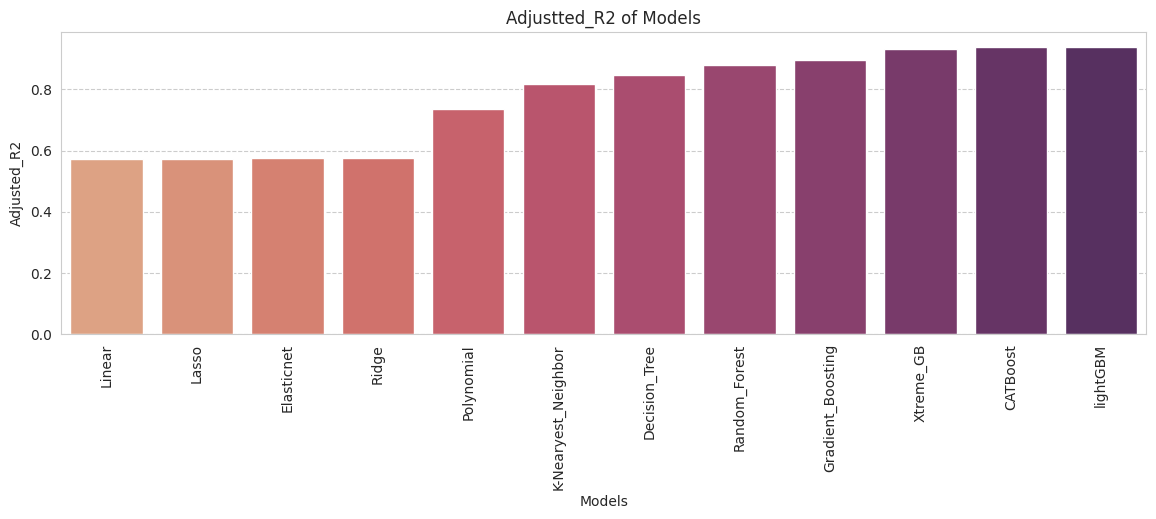

In [118]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

#Final Conclusion
It is quite evident from the results that lightGBM and Catboost is the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) show a higher value for the lightGBM and Catboost models !

So, we can use either lightGBM or catboost model for the above problem

In [119]:
final_df_1=final_df.copy()

In [120]:
list(range(0,4000,500))

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

In [121]:
bins=[-5, 500, 1000, 1500, 2000, 2500,final_df_1['Rented Bike Count'].max()]
labels=['less than 500', 'less than 1000', 'less than 1500','less than 2000','less than 2500','greater than 2500']
final_df_1['cuts'] = pd.cut(final_df_1['Rented Bike Count'], bins, labels=labels)
final_df_1.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend,cuts
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,less than 500
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,less than 500
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,less than 500
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,less than 500
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,less than 500


In [122]:
lr_rmse=[]
xgb_rmse=[]

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [124]:
list(final_df_1['cuts'].unique())

['less than 500',
 'less than 1000',
 'less than 1500',
 'less than 2000',
 'less than 2500',
 'greater than 2500']

In [125]:
print("Rmse score for every quantile of LightGBM")
for i in sorted(final_df_1['cuts'].unique()):
  final_df_2=final_df_1[final_df_1['cuts']==i]
  ytest_1 = final_df_2['Rented Bike Count']
  xtest_1=final_df_2.drop(['Rented Bike Count','cuts'],axis=1)
  Y_pred = lgbr_grid.predict(xtest_1)
  MSE  = mean_squared_error(ytest_1,Y_pred)
  print(f'Quantie fare amount {i}')
  # print(Y_test.min(),Y_test.max())
  print("MSE :" , round(MSE,2))
  RMSE = round(np.sqrt(MSE),2)
  lr_rmse.append(RMSE)
  print("RMSE :" ,RMSE)
  print("="*25)

Rmse score for every quantile of LightGBM
Quantie fare amount greater than 2500
MSE : 48350.99
RMSE : 219.89
Quantie fare amount less than 1000
MSE : 12685.11
RMSE : 112.63
Quantie fare amount less than 1500
MSE : 14997.65
RMSE : 122.46
Quantie fare amount less than 2000
MSE : 21885.81
RMSE : 147.94
Quantie fare amount less than 2500
MSE : 25298.46
RMSE : 159.05
Quantie fare amount less than 500
MSE : 6517.46
RMSE : 80.73


In [126]:
print("Rmse score for every quantile of CATBoost")
for i in sorted(final_df_1['cuts'].unique()):
  final_df_2=final_df_1[final_df_1['cuts']==i]
  ytest_1 = final_df_2['Rented Bike Count']
  xtest_1=final_df_2.drop(['Rented Bike Count','cuts'],axis=1)
  Y_pred = cb_model.predict(xtest_1)
  MSE  = mean_squared_error(ytest_1,Y_pred)
  print(f'Quantie fare amount {i}')
  # print(Y_test.min(),Y_test.max())
  print("MSE :" , round(MSE,2))
  RMSE = round(np.sqrt(MSE),2)
  xgb_rmse.append(RMSE)
  print("RMSE :" ,RMSE)
  print("="*25)

Rmse score for every quantile of CATBoost
Quantie fare amount greater than 2500
MSE : 58304.19
RMSE : 241.46
Quantie fare amount less than 1000
MSE : 15955.06
RMSE : 126.31
Quantie fare amount less than 1500
MSE : 16250.59
RMSE : 127.48
Quantie fare amount less than 2000
MSE : 27537.83
RMSE : 165.95
Quantie fare amount less than 2500
MSE : 40604.5
RMSE : 201.51
Quantie fare amount less than 500
MSE : 8564.3
RMSE : 92.54
